<a href="https://colab.research.google.com/github/rmatrella/BirdsSound/blob/main/Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd "/content/drive/MyDrive/Marino_Matrella"
root = os.getcwd()


Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project


In [ ]:
!pip install tensorflow_addons
! pip install -q "tqdm>=4.36.1"
!pip install spec_augment
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%run "/content/drive/MyDrive/Marino_Matrella/Utilities.ipynb"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tensor version is  2.14.0-dev20230626


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow_addons as tfa
from tensorflow.keras.metrics import Precision, Recall, F1Score

from numpy.random import seed
import pickle

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.14.0-dev20230626). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(


In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
EPOCHS=15
MODEL_FOLDER = os.path.join(root, 'birds/model/Scratch/')

In [ ]:
PATH = os.path.join(root,'birds/dataset')

train_set = image_dataset_from_directory(
    os.path.join(PATH, 'train_audio_aug'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

test_set = image_dataset_from_directory(
    os.path.join(PATH, 'test'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=False,
    color_mode='rgb')

validation_set = image_dataset_from_directory(
    os.path.join(PATH, 'validation'),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    labels="inferred",
    shuffle=True,
    color_mode='rgb')

Found 10000 files belonging to 100 classes.
Found 5306 files belonging to 100 classes.
Found 7983 files belonging to 100 classes.


## First experiment NO

In [ ]:

# model
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Rescaling(1. / 255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256)(x)
outputs = keras.layers.Dense(100, activation='softmax', name='predictions')(x)
model = keras.Model(inputs, outputs)
model = compile_model(model, "adam")

In [ ]:
history = run_model(model, 'Scratch_1ex', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.2804 - accuracy: 0.0654 - f1_score: 0.0602
Epoch 1: val_loss improved from inf to 3.82794, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_1ex.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 96s 299ms/step - loss: 4.2804 - accuracy: 0.0654 - f1_score: 0.0602 - val_loss: 3.8279 - val_accuracy: 0.1468 - val_f1_score: 0.1233 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.3424 - accuracy: 0.2184 - f1_score: 0.1990
Epoch 2: val_loss improved from 3.82794 to 3.38537, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_1ex.h5
313/313 [==============================] - 91s 287ms/step - loss: 3.3424 - accuracy: 0.2184 - f1_score: 0.1990 - val_loss: 3.3854 - val_accuracy: 0.2064 - val_f1_score: 0.2039 - lr: 1.0000e-04
Epoch 3/50
311/313 [============================>.] - ETA: 0s - loss: 2.7143 - accuracy: 0.3522 - f1_score: 0.3407
Epoch 3: val_loss improved from 3.38537 to 3.22860, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_1ex.h5
313/31

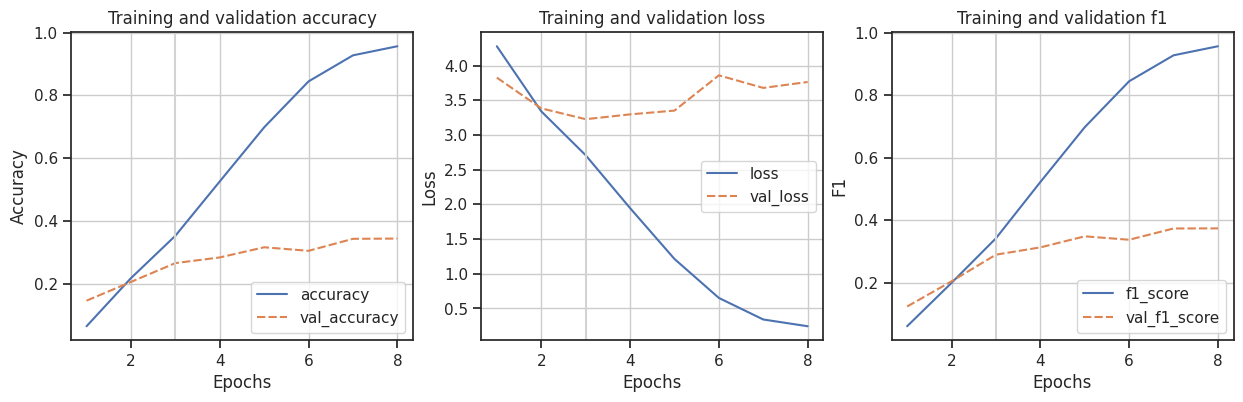

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'Scratch_1ex'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + "/Scratch_1ex.h5"))

166/166 [==============================] - 25s 150ms/step - loss: 3.2565 - accuracy: 0.2597 - f1_score: 0.2850

Test loss: 3.256
Test accuracy: 0.260
Test f1: 0.285

Accuracy on test data: 25.97 %
F1-Score on test data: 28.50 %

              precision    recall  f1-score   support

     abhori1       0.27      0.34      0.30        50
     afecuc1       0.12      0.32      0.18        28
     afghor1       0.26      0.55      0.35        20
     afmdov1       0.17      0.33      0.22        15
     afpfly1       0.00      0.00      0.00        31
     afpwag1       0.12      0.12      0.12        24
     afrgos1       0.15      0.50      0.23        24
     afrthr1       0.30      0.70      0.42        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.35      0.14      0.21       166
     bawhor2       0.15      0.47      0.23        15
     bcbeat1       0.00      0.00      0.00        17
     beasun2       0.05      0.17      0.07        12
     bkctch1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Second experiment

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Rescaling(1. / 255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(100, activation='softmax', name='predictions')(x)
model = keras.Model(inputs, outputs)
model = compile_model(model, "adam")

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                     

In [ ]:
history = run_model(model, 'Scratch_2_ex', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.3372 - accuracy: 0.0467 - f1_score: 0.0451
Epoch 1: val_loss improved from inf to 3.54900, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_2_ex.h5
313/313 [==============================] - 97s 302ms/step - loss: 4.3372 - accuracy: 0.0467 - f1_score: 0.0451 - val_loss: 3.5490 - val_accuracy: 0.1616 - val_f1_score: 0.1580 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 3.3666 - accuracy: 0.2064 - f1_score: 0.1874
Epoch 2: val_loss improved from 3.54900 to 3.01728, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_2_ex.h5
313/313 [==============================] - 90s 286ms/step - loss: 3.3660 - accuracy: 0.2064 - f1_score: 0.1874 - val_loss: 3.0173 - val_accuracy: 0.2860 - val_f1_score: 0.3013 - lr: 1.0000e-04
Epoch 3/

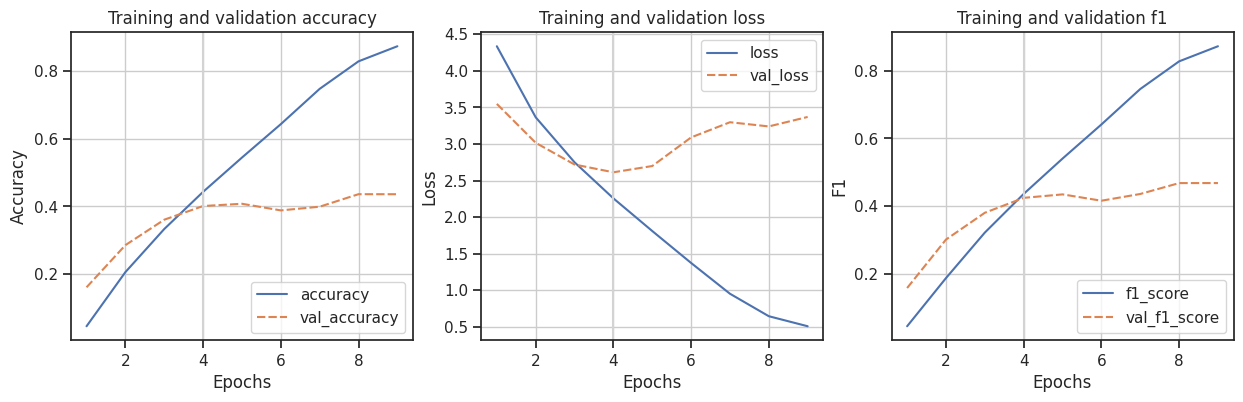

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'Scratch_2_ex'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + "/Scratch_2_ex.h5"))

166/166 [==============================] - 26s 153ms/step - loss: 2.6472 - accuracy: 0.3922 - f1_score: 0.4174

Test loss: 2.647
Test accuracy: 0.392
Test f1: 0.417

Accuracy on test data: 39.22 %
F1-Score on test data: 41.74 %

              precision    recall  f1-score   support

     abhori1       0.38      0.60      0.47        50
     afecuc1       0.52      0.50      0.51        28
     afghor1       0.45      0.45      0.45        20
     afmdov1       0.12      0.47      0.19        15
     afpfly1       0.00      0.00      0.00        31
     afpwag1       0.16      0.42      0.23        24
     afrgos1       0.35      0.54      0.43        24
     afrthr1       0.58      0.63      0.60        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.31      0.03      0.05       166
     bawhor2       0.08      0.07      0.07        15
     bcbeat1       0.14      0.35      0.20        17
     beasun2       0.07      0.25      0.11        12
     bkctch1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Third Experiment

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Rescaling(1. / 255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(100, activation='softmax', name='predictions')(x)
model = keras.Model(inputs, outputs)
model = compile_model(model, "adam")
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                     

In [ ]:
history = run_model(model, 'Scratch_3_ex', train_set, validation_set, MODEL_FOLDER)

Epoch 1/50
312/313 [============================>.] - ETA: 0s - loss: 4.6025 - accuracy: 0.0100 - f1_score: 0.0016
Epoch 1: val_loss improved from inf to 4.59141, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_3_ex.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 125s 392ms/step - loss: 4.6024 - accuracy: 0.0100 - f1_score: 0.0016 - val_loss: 4.5914 - val_accuracy: 0.0120 - val_f1_score: 5.0562e-04 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.4813 - accuracy: 0.0276 - f1_score: 0.0136
Epoch 2: val_loss improved from 4.59141 to 4.32782, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_3_ex.h5
313/313 [==============================] - 93s 294ms/step - loss: 4.4808 - accuracy: 0.0278 - f1_score: 0.0137 - val_loss: 4.3278 - val_accuracy: 0.0609 - val_f1_score: 0.0451 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 4.2285 - accuracy: 0.0793 - f1_score: 0.0613
Epoch 3: val_loss improved from 4.32782 to 3.99929, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_3_ex.h5

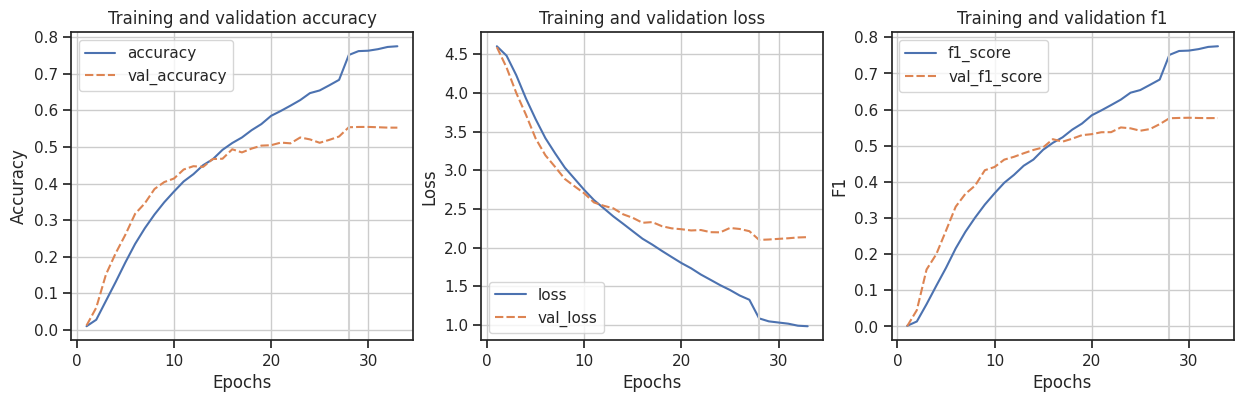

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'Scratch_3_ex'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + "/Scratch_3_ex.h5"))

166/166 [==============================] - 28s 167ms/step - loss: 2.1542 - accuracy: 0.5505 - f1_score: 0.5725

Test loss: 2.154
Test accuracy: 0.551
Test f1: 0.573

Accuracy on test data: 55.05 %
F1-Score on test data: 57.25 %

              precision    recall  f1-score   support

     abhori1       0.50      0.60      0.55        50
     afecuc1       0.74      0.71      0.73        28
     afghor1       0.48      0.65      0.55        20
     afmdov1       0.27      0.67      0.38        15
     afpfly1       0.23      0.29      0.26        31
     afpwag1       0.39      0.54      0.46        24
     afrgos1       0.46      0.67      0.54        24
     afrthr1       0.64      0.60      0.62        30
     amesun2       0.10      0.15      0.12        13
      barswa       0.70      0.29      0.41       166
     bawhor2       0.14      0.40      0.21        15
     bcbeat1       0.29      0.82      0.42        17
     beasun2       0.29      0.50      0.36        12
     bkctch1  

# Fourth experiment

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Rescaling(1. / 255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(100, activation='softmax', name='predictions')(x)
model = keras.Model(inputs, outputs)
model = compile_model(model, "adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                        

In [ ]:
history = run_model(model, 'Scratch_4ex', train_set, validation_set, MODEL_FOLDER)


Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.6002 - accuracy: 0.0094 - f1_score: 0.0028 
Epoch 1: val_loss improved from inf to 4.58105, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_4ex.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6988s 22s/step - loss: 4.6002 - accuracy: 0.0094 - f1_score: 0.0028 - val_loss: 4.5811 - val_accuracy: 0.0122 - val_f1_score: 7.1457e-04 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 4.5130 - accuracy: 0.0235 - f1_score: 0.0106
Epoch 2: val_loss improved from 4.58105 to 4.55793, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_4ex.h5
313/313 [==============================] - 90s 284ms/step - loss: 4.5129 - accuracy: 0.0235 - f1_score: 0.0106 - val_loss: 4.5579 - val_accuracy: 0.0189 - val_f1_score: 0.0036 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 4.4395 - accuracy: 0.0298 - f1_score: 0.0173
Epoch 3: val_loss improved from 4.55793 to 4.40073, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_4ex.h5
31

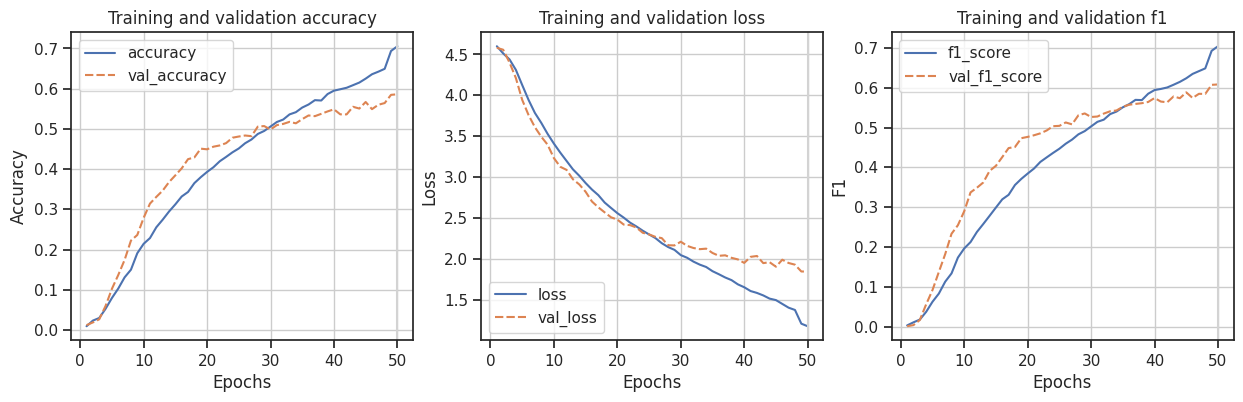

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'Scratch_4ex'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + "/Scratch_4ex.h5"))

166/166 [==============================] - 25s 150ms/step - loss: 1.9132 - accuracy: 0.5712 - f1_score: 0.5929

Test loss: 1.913
Test accuracy: 0.571
Test f1: 0.593

Accuracy on test data: 57.12 %
F1-Score on test data: 59.29 %

              precision    recall  f1-score   support

     abhori1       0.68      0.64      0.66        50
     afecuc1       0.85      0.82      0.84        28
     afghor1       0.50      0.80      0.62        20
     afmdov1       0.26      0.67      0.37        15
     afpfly1       0.19      0.26      0.22        31
     afpwag1       0.48      0.54      0.51        24
     afrgos1       0.53      0.67      0.59        24
     afrthr1       0.70      0.63      0.67        30
     amesun2       0.12      0.23      0.16        13
      barswa       0.61      0.44      0.51       166
     bawhor2       0.16      0.40      0.23        15
     bcbeat1       0.18      0.71      0.28        17
     beasun2       0.25      0.50      0.33        12
     bkctch1  

# Fifth experiment - not so good

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Rescaling(1. / 255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=4)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dense(128)(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(100, activation='softmax', name='predictions')(x)
model = keras.Model(inputs, outputs)
model = compile_model(model, "adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 64)        0         
 g2D)                                                        

In [ ]:
history = run_model(model, 'Scratch_5ex', train_set, validation_set, MODEL_FOLDER)


Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.6030 - accuracy: 0.0099 - f1_score: 0.0065
Epoch 1: val_loss improved from inf to 4.57326, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_5ex.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 108s 309ms/step - loss: 4.6030 - accuracy: 0.0099 - f1_score: 0.0065 - val_loss: 4.5733 - val_accuracy: 0.0095 - val_f1_score: 0.0050 - lr: 1.0000e-04
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.3161 - accuracy: 0.0452 - f1_score: 0.0321
Epoch 2: val_loss improved from 4.57326 to 4.03009, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_5ex.h5
313/313 [==============================] - 91s 287ms/step - loss: 4.3161 - accuracy: 0.0452 - f1_score: 0.0321 - val_loss: 4.0301 - val_accuracy: 0.0923 - val_f1_score: 0.0643 - lr: 1.0000e-04
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.9099 - accuracy: 0.0975 - f1_score: 0.0798
Epoch 3: val_loss improved from 4.03009 to 3.67471, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_5ex.h5
313/3

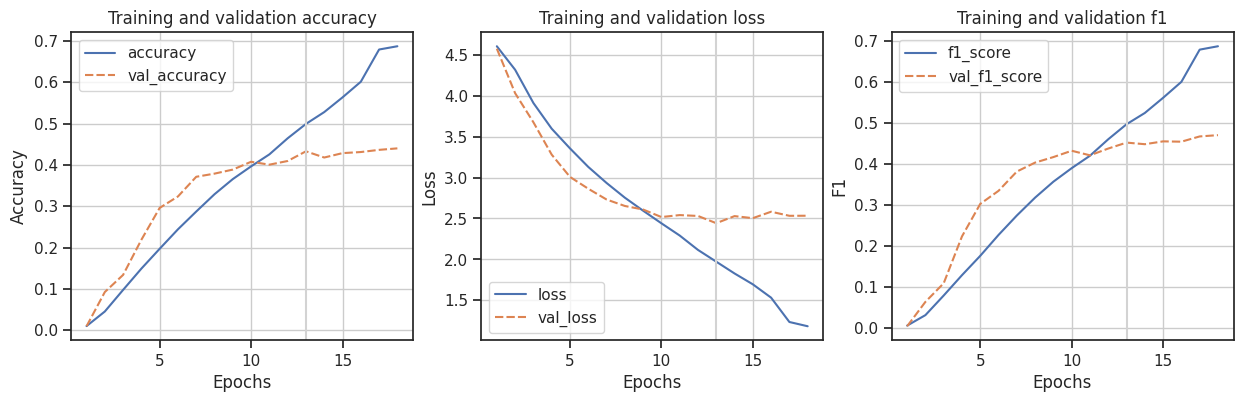

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'Scratch_5ex'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + "/Scratch_5ex.h5"))

166/166 [==============================] - 25s 148ms/step - loss: 2.5103 - accuracy: 0.4271 - f1_score: 0.4465

Test loss: 2.510
Test accuracy: 0.427
Test f1: 0.447

Accuracy on test data: 42.71 %
F1-Score on test data: 44.65 %

              precision    recall  f1-score   support

     abhori1       0.29      0.54      0.38        50
     afecuc1       0.62      0.64      0.63        28
     afghor1       0.37      0.65      0.47        20
     afmdov1       0.14      0.13      0.14        15
     afpfly1       0.50      0.03      0.06        31
     afpwag1       0.12      0.46      0.19        24
     afrgos1       0.50      0.29      0.37        24
     afrthr1       0.71      0.57      0.63        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.52      0.07      0.12       166
     bawhor2       0.08      0.27      0.13        15
     bcbeat1       0.17      0.59      0.26        17
     beasun2       0.09      0.25      0.13        12
     bkctch1  

# Sixth experiment

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = keras.layers.Rescaling(1. / 255)(inputs)
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, kernel_regularizer='l1_l2')(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(100, activation='softmax', name='predictions')(x)
model = keras.Model(inputs, outputs)
model = compile_model(model, "adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                        

In [ ]:
history = run_model(model, 'Scratch_6ex', train_set, validation_set, MODEL_FOLDER)


Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 46.7168 - accuracy: 0.0086 - f1_score: 0.0023
Epoch 1: val_loss improved from inf to 30.11481, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_6ex.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2152s 7s/step - loss: 46.7168 - accuracy: 0.0086 - f1_score: 0.0023 - val_loss: 30.1148 - val_accuracy: 0.0115 - val_f1_score: 2.8265e-04 - lr: 1.0000e-04
Epoch 2/50
312/313 [============================>.] - ETA: 0s - loss: 19.0229 - accuracy: 0.0184 - f1_score: 0.0063
Epoch 2: val_loss improved from 30.11481 to 10.53909, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_6ex.h5
313/313 [==============================] - 91s 288ms/step - loss: 19.0092 - accuracy: 0.0184 - f1_score: 0.0063 - val_loss: 10.5391 - val_accuracy: 0.0159 - val_f1_score: 0.0020 - lr: 1.0000e-04
Epoch 3/50
312/313 [============================>.] - ETA: 0s - loss: 6.7214 - accuracy: 0.0218 - f1_score: 0.0108
Epoch 3: val_loss improved from 10.53909 to 4.86213, saving model to /content/drive/.shortcut-targets-by-id/1pfBa0fnatsy0qYLtZ2wpGwzSR-zOPP2W/CIDL project/birds/model/Scratch/Scratch_6e

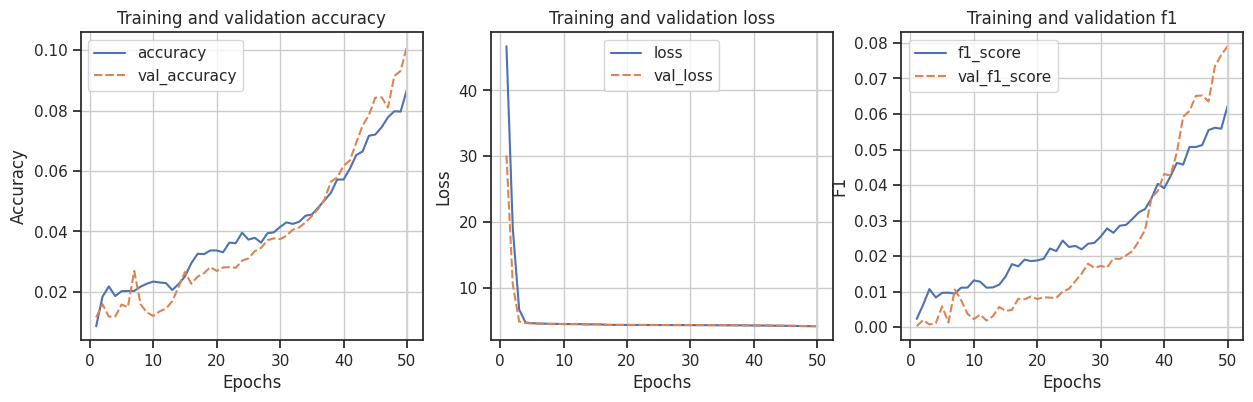

In [ ]:
plot_model_performance(path=os.path.join(MODEL_FOLDER, 'Scratch_6ex'), axis=0)

In [ ]:
evaluate_model(tf.keras.models.load_model(MODEL_FOLDER + "/Scratch_6ex.h5"))

166/166 [==============================] - 26s 155ms/step - loss: 4.1640 - accuracy: 0.0972 - f1_score: 0.0817

Test loss: 4.164
Test accuracy: 0.097
Test f1: 0.082

Accuracy on test data: 9.72 %
F1-Score on test data: 8.17 %

              precision    recall  f1-score   support

     abhori1       0.05      0.26      0.08        50
     afecuc1       0.00      0.00      0.00        28
     afghor1       0.05      0.70      0.09        20
     afmdov1       0.01      0.07      0.01        15
     afpfly1       0.00      0.00      0.00        31
     afpwag1       0.03      0.21      0.06        24
     afrgos1       0.00      0.00      0.00        24
     afrthr1       0.13      0.50      0.21        30
     amesun2       0.00      0.00      0.00        13
      barswa       0.40      0.01      0.02       166
     bawhor2       0.00      0.00      0.00        15
     bcbeat1       0.00      0.00      0.00        17
     beasun2       0.00      0.00      0.00        12
     bkctch1    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
